In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


In [2]:
import pandas as pd
train_df = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')

print("Training Data Head:")
display(train_df.head())

print("\nTest Data Head:")
display(test_df.head())

Training Data Head:


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0



Test Data Head:


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [3]:
summary_stats = train_df.describe()
print("\nTraining Data Description:")
display(summary_stats.style.set_caption("Summary Statistics of Training Data").background_gradient(cmap='Blues'))


Training Data Description:


,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,64046.172871,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,37931.106978,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4200.000000,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,42000.000000,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,58000.000000,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,75600.000000,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1900000.000000,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [4]:
missing_values = train_df.isnull().sum().reset_index()
missing_values.columns = ['Feature', 'Missing Values']
print("\nMissing Values in Training Data:")
display(missing_values.style.set_caption("Missing Values Count").background_gradient(cmap='Reds'))


Missing Values in Training Data:


,Feature,Missing Values
0,id,0
1,person_age,0
2,person_income,0
3,person_home_ownership,0
4,person_emp_length,0
5,loan_intent,0
6,loan_grade,0
7,loan_amnt,0
8,loan_int_rate,0
9,loan_percent_income,0


In [5]:
data_types = train_df.dtypes.reset_index()
data_types.columns = ['Feature', 'Data Type']
print("\nData Types in Training Data:")
display(data_types.style.set_caption("Data Types of Features").background_gradient(cmap='Greens'))


Data Types in Training Data:


,Feature,Data Type
0,id,int64
1,person_age,int64
2,person_income,int64
3,person_home_ownership,object
4,person_emp_length,float64
5,loan_intent,object
6,loan_grade,object
7,loan_amnt,int64
8,loan_int_rate,float64
9,loan_percent_income,float64


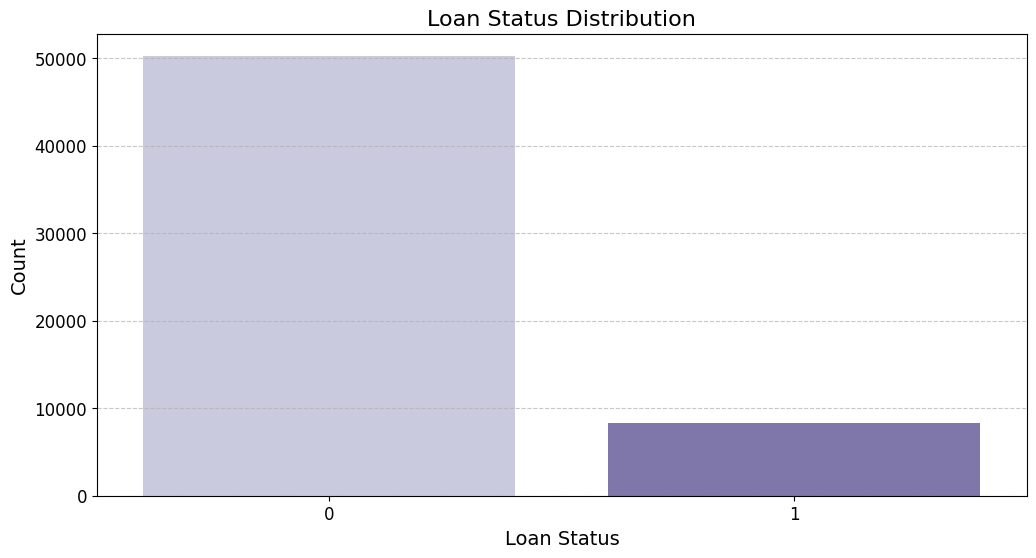

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(12, 6))
sns.countplot(x='loan_status', data=train_df, palette='Purples', order=train_df['loan_status'].value_counts().index)
plt.title('Loan Status Distribution', fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

> Visualization for Numeric Features

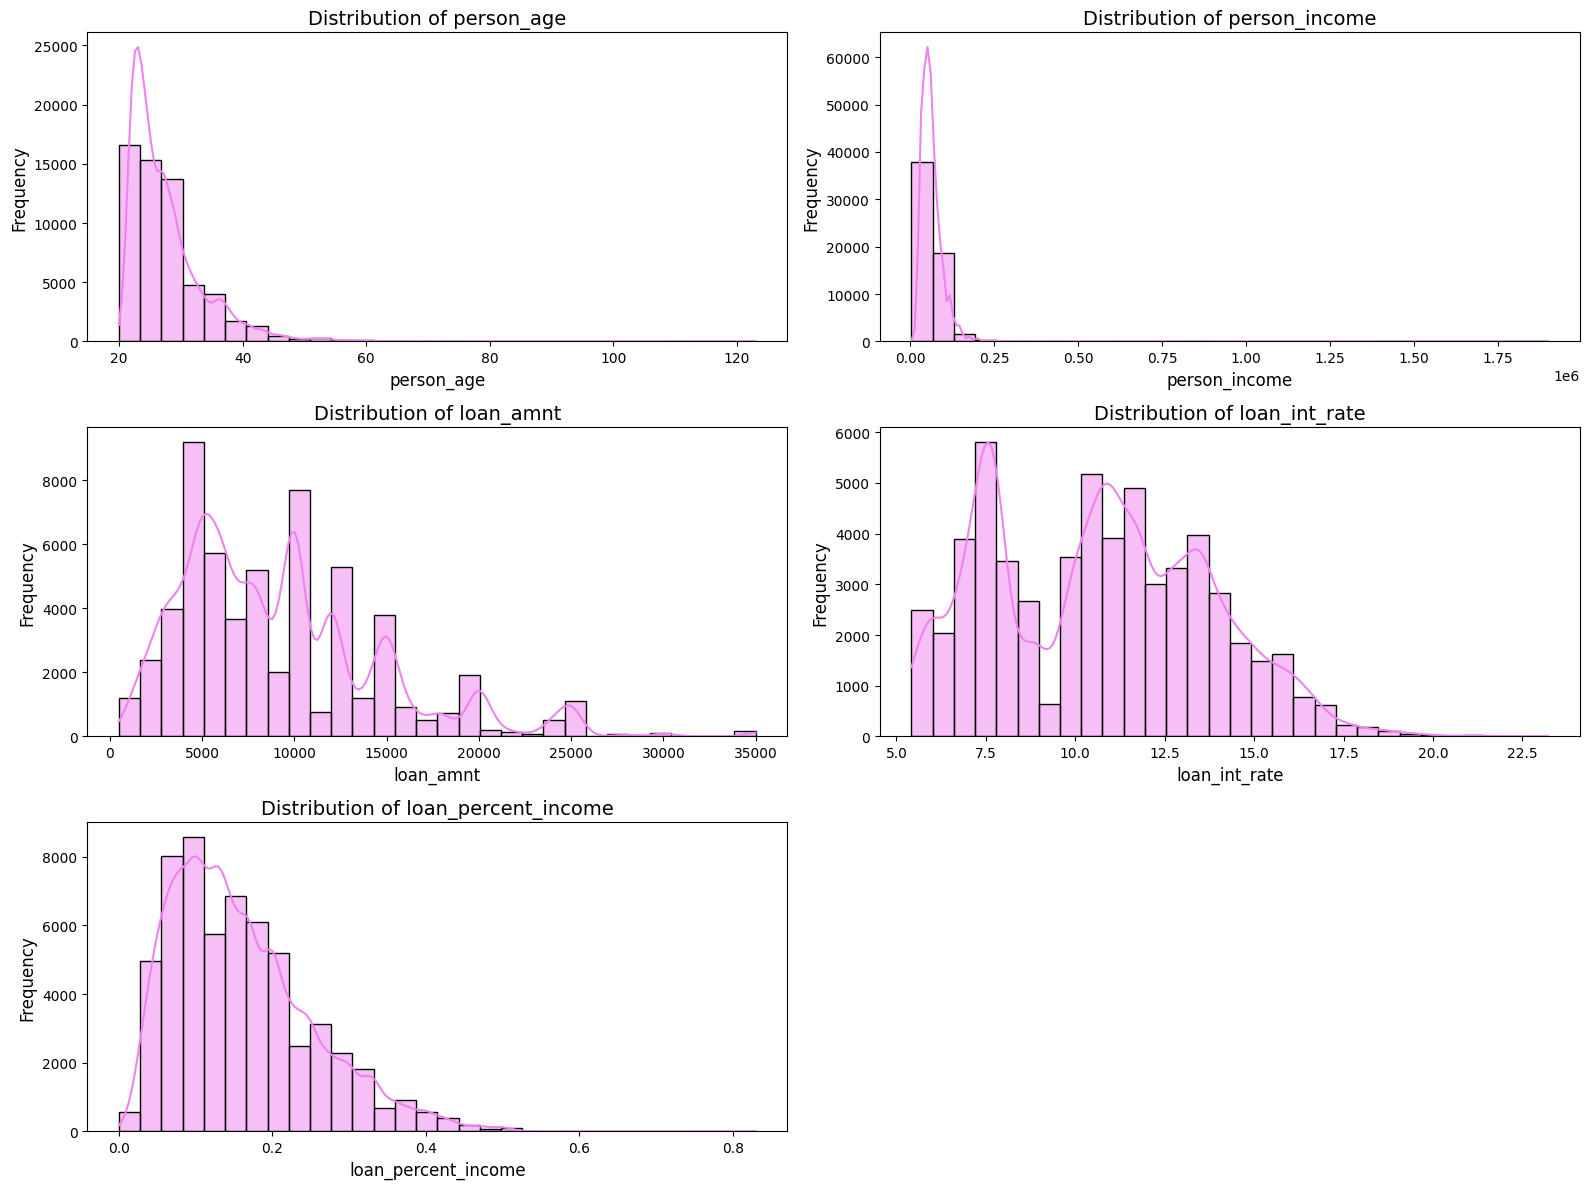

In [7]:
numeric_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(train_df[feature], kde=True, color='violet', bins=30)
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

> Visualizing Categorical Features Against Loan Status

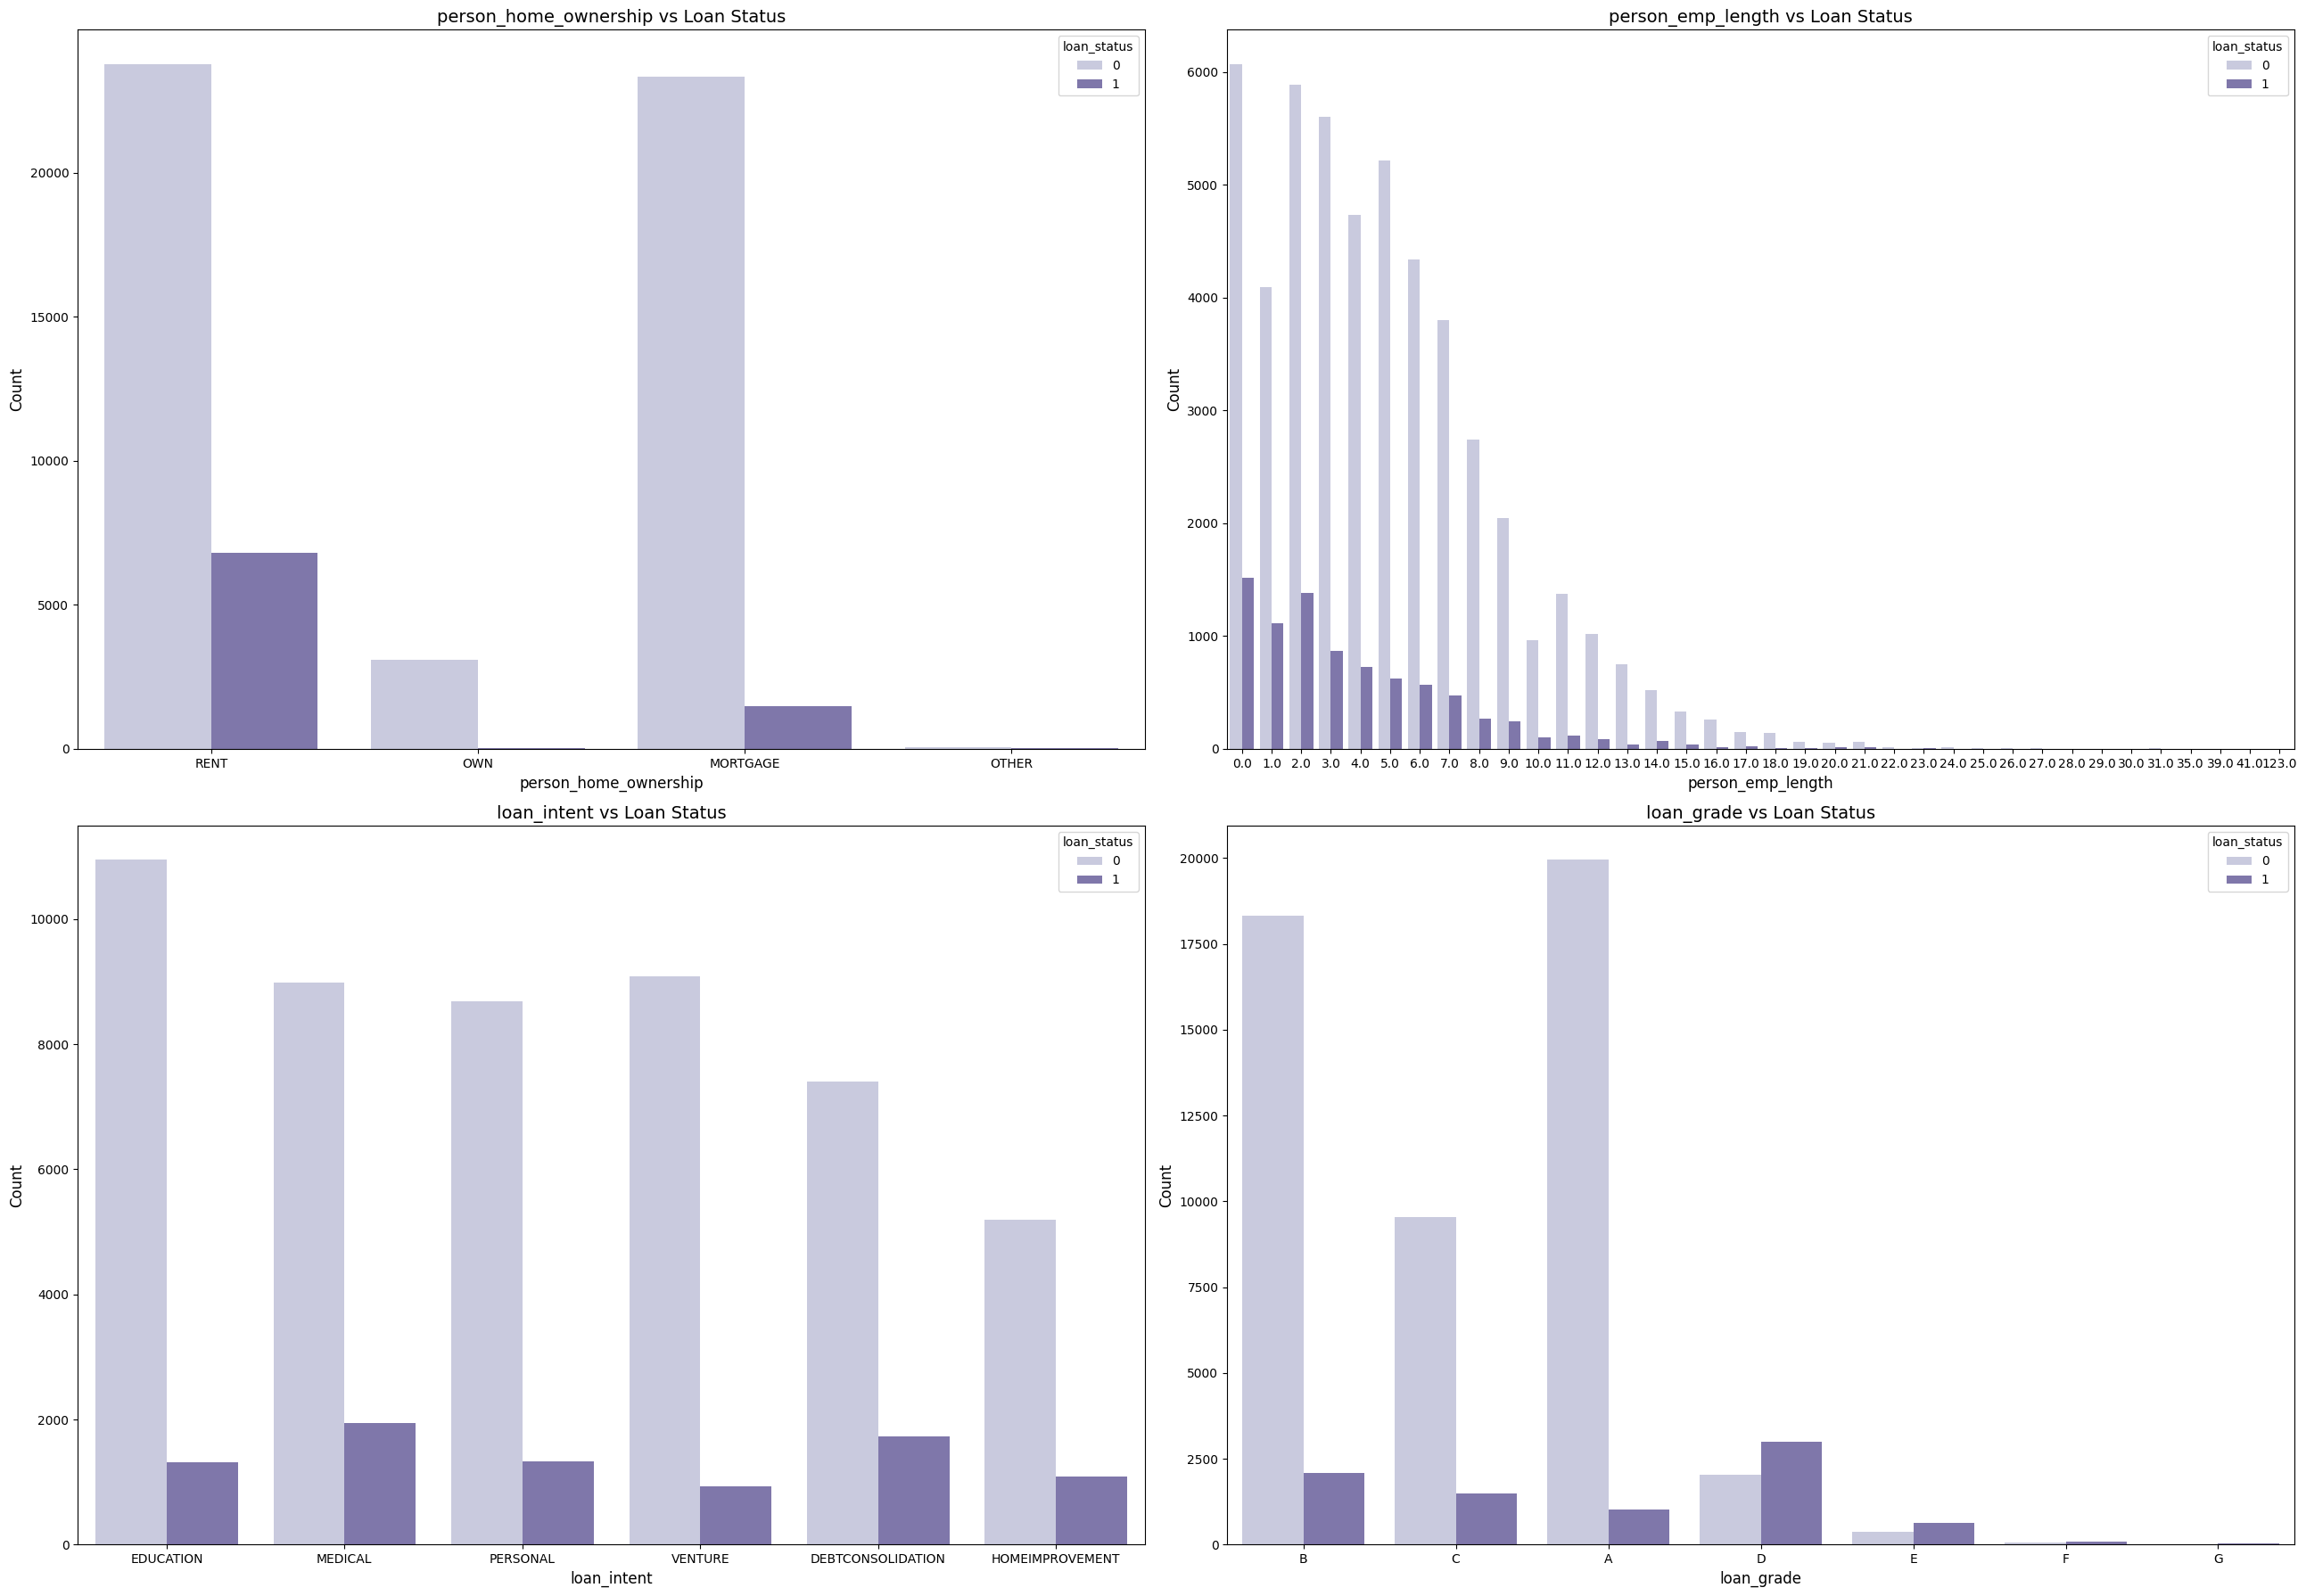

In [8]:
categorical_features = ['person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade']

plt.figure(figsize=(26, 18))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, hue='loan_status', data=train_df, palette='Purples')
    plt.title(f'{feature} vs Loan Status', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [9]:
train_df.fillna(train_df.median(numeric_only=True), inplace=True)
train_df.fillna(train_df.mode().iloc[0], inplace=True)
print("Missing values after handling:")
missing_values_after = train_df.isnull().sum().reset_index()
missing_values_after.columns = ['Feature', 'Missing Values']
display(missing_values_after.style.set_caption("Remaining Missing Values").background_gradient(cmap='Reds'))
train_df_encoded = pd.get_dummies(train_df, drop_first=True)

Missing values after handling:


,Feature,Missing Values
0,id,0
1,person_age,0
2,person_income,0
3,person_home_ownership,0
4,person_emp_length,0
5,loan_intent,0
6,loan_grade,0
7,loan_amnt,0
8,loan_int_rate,0
9,loan_percent_income,0


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_df_encoded.drop(columns=['loan_status']))

scaled_features_df = pd.DataFrame(scaled_features, columns=train_df_encoded.drop(columns=['loan_status']).columns)

print("Sample of Scaled Features:")
display(scaled_features_df.head().style.set_caption("Scaled Features").background_gradient(cmap='coolwarm'))

Sample of Scaled Features:


,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,-1.732021,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,-0.038986,-0.237768,0.957538,1.944005,-0.346305,-0.478719,-0.453837,-0.453700,1.369217,-0.481461,-0.306429,-0.132312,-0.050470,-0.023728,-0.417419
1,-1.731962,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,-0.038986,4.205788,-1.044345,-0.514402,-0.346305,2.088910,-0.453837,-0.453700,-0.730344,2.077010,-0.306429,-0.132312,-0.050470,-0.023728,-0.417419
2,-1.731903,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,-0.038986,4.205788,-1.044345,-0.514402,-0.346305,-0.478719,2.203436,-0.453700,-0.730344,-0.481461,-0.306429,-0.132312,-0.050470,-0.023728,-0.417419
3,-1.731844,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,-0.038986,-0.237768,0.957538,-0.514402,-0.346305,-0.478719,-0.453837,2.204100,1.369217,-0.481461,-0.306429,-0.132312,-0.050470,-0.023728,-0.417419
4,-1.731785,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,-0.038986,-0.237768,0.957538,-0.514402,-0.346305,2.088910,-0.453837,-0.453700,-0.730344,-0.481461,-0.306429,-0.132312,-0.050470,-0.023728,-0.417419


**Step 4: Model Building**

In [11]:
from sklearn.model_selection import train_test_split

X = scaled_features_df
y = train_df_encoded['loan_status']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report

rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_val)
rf_auc = roc_auc_score(y_val, rf_model.predict_proba(X_val)[:, 1])

xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_val)
xgb_auc = roc_auc_score(y_val, xgb_model.predict_proba(X_val)[:, 1])

rf_report = classification_report(y_val, rf_predictions, output_dict=True)
xgb_report = classification_report(y_val, xgb_predictions, output_dict=True)

print("Model Performance Metrics:")
auc_table = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'AUC': [rf_auc, xgb_auc]
})

display(auc_table.style.set_caption("Model AUC Scores").background_gradient(cmap='Blues'))

print("\nRandom Forest Classification Report:")
display(pd.DataFrame(rf_report).T.style.background_gradient(cmap='coolwarm'))

print("\nXGBoost Classification Report:")
display(pd.DataFrame(xgb_report).T.style.background_gradient(cmap='coolwarm'))


Model Performance Metrics:


,Model,AUC
0,Random Forest,0.936984
1,XGBoost,0.953134



Random Forest Classification Report:


,precision,recall,f1-score,support
0,0.955556,0.988996,0.971988,10087.000000
1,0.913887,0.717418,0.803821,1642.000000
accuracy,0.950976,0.950976,0.950976,0.950976
macro avg,0.934721,0.853207,0.887905,11729.000000
weighted avg,0.949722,0.950976,0.948446,11729.000000



XGBoost Classification Report:


,precision,recall,f1-score,support
0,0.960487,0.985625,0.972894,10087.000000
1,0.894775,0.750914,0.816556,1642.000000
accuracy,0.952767,0.952767,0.952767,0.952767
macro avg,0.927631,0.868269,0.894725,11729.000000
weighted avg,0.951288,0.952767,0.951007,11729.000000


**Hyperparameter Tuning**

In [12]:
from sklearn.model_selection import GridSearchCV

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='roc_auc')
rf_grid_search.fit(X_train, y_train)

print("Best Random Forest Parameters:", rf_grid_search.best_params_)
print("Best AUC Score:", rf_grid_search.best_score_)

Best Random Forest Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best AUC Score: 0.9357319326528243


**Ensemble Learning**

In [13]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[('rf', rf_model), ('xgb', xgb_model)], voting='soft')
ensemble_model.fit(X_train, y_train)

ensemble_predictions = ensemble_model.predict(X_val)
ensemble_auc = roc_auc_score(y_val, ensemble_model.predict_proba(X_val)[:, 1])

print("Ensemble Model AUC:", ensemble_auc)

Ensemble Model AUC: 0.9512352762392279


In [14]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=rf_model, n_features_to_select=5)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['id', 'person_income', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income'],
      dtype='object')


In [15]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_val, xgb_model.predict_proba(X_val)[:, 1])

In [16]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

**Model Interpretability**

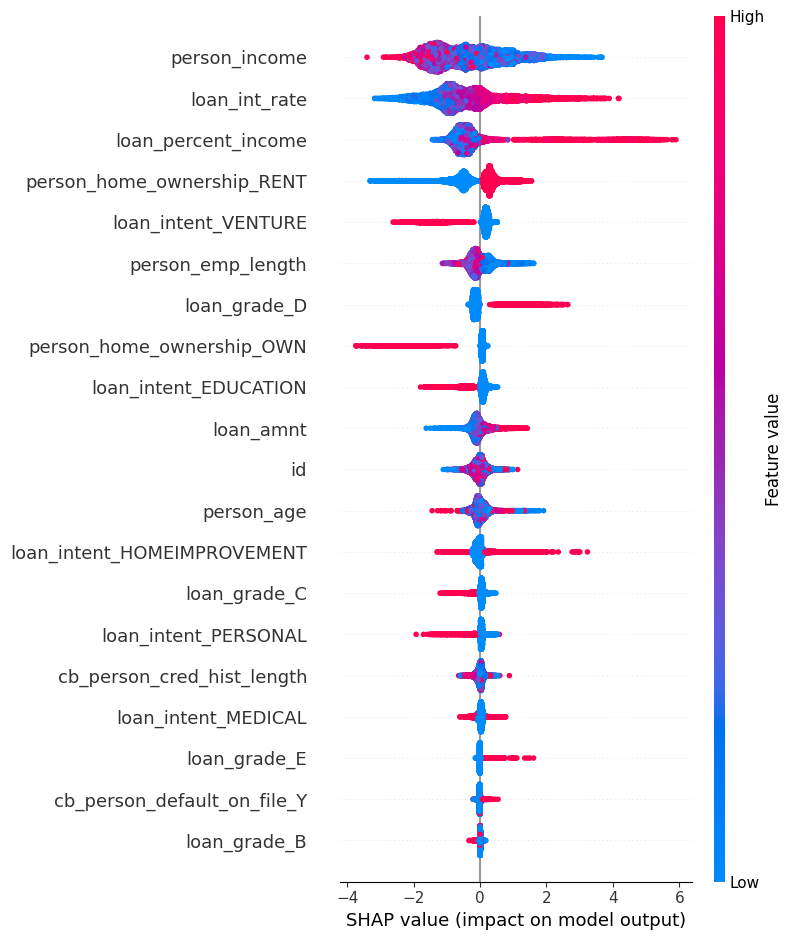

In [17]:
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val)

> Feature Importance - Random Forest

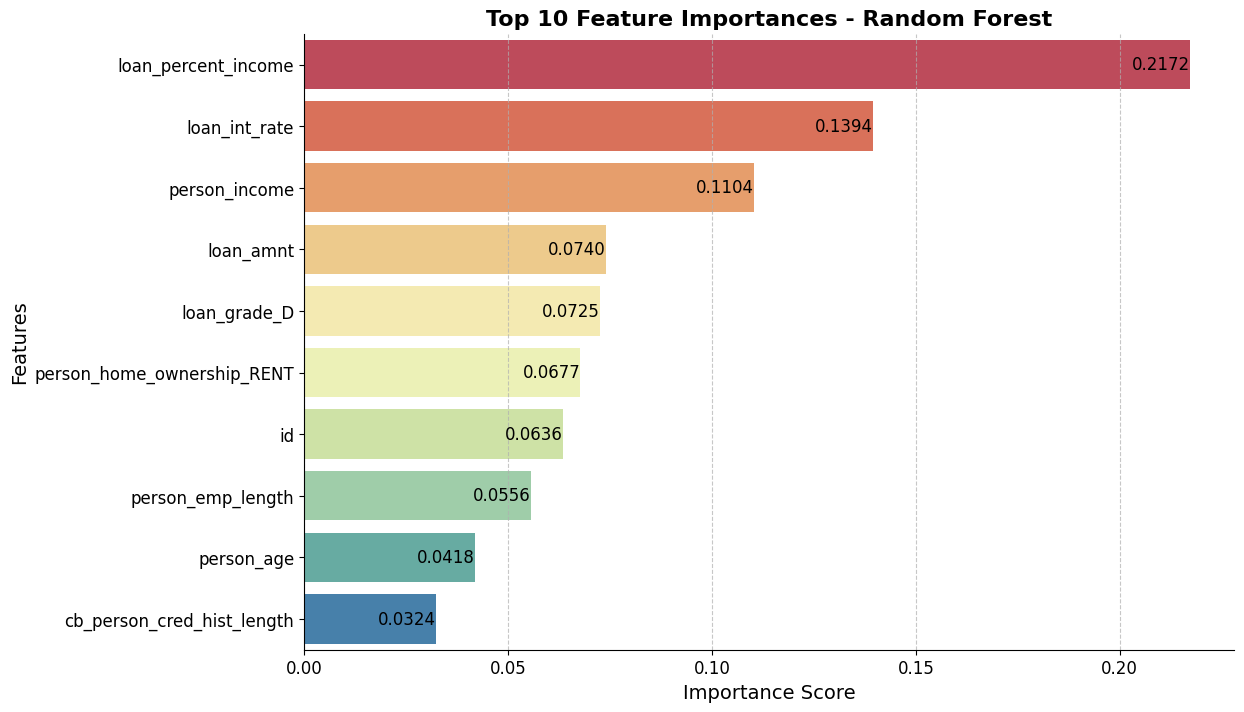

In [18]:
importances_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
colors = sns.color_palette("Spectral", len(importances_rf.head(10)))
sns.barplot(x='Importance', y='Feature', data=importances_rf.head(10), palette=colors)

plt.title('Top 10 Feature Importances - Random Forest', fontsize=16, weight='bold')
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)

for index, value in enumerate(importances_rf['Importance'].head(10)):
    plt.text(value, index, f'{value:.4f}', va='center', ha='right', color='black', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

> ROC Curve Visualization for XGBoost

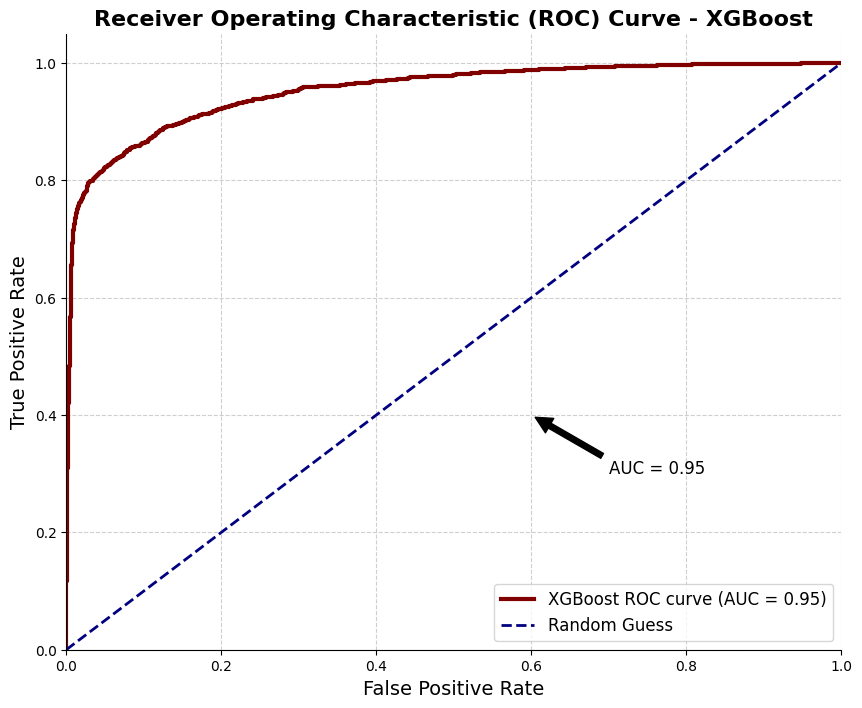

In [19]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, xgb_model.predict_proba(X_val)[:, 1])

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='maroon', lw=3, label='XGBoost ROC curve (AUC = %0.2f)' % xgb_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

plt.annotate(f'AUC = {xgb_auc:.2f}', xy=(0.6, 0.4), xytext=(0.7, 0.3),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost', fontsize=16, weight='bold')
plt.legend(loc="lower right", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()

plt.show()

**Financial Analysis of Loan Approvals**

For this step, I’ll focus on financial features such as:

person_income: The applicant’s income.

loan_amnt: The loan amount requested.

loan_percent_income: The percentage of the person’s income that the loan amount represents.

loan_int_rate: The interest rate on the loan.

1. Debt-to-Income Ratio Analysis
The debt-to-income (DTI) ratio is a key metric in financial analysis. It represents the percentage of a borrower’s monthly income that goes toward debt payments.

2. Income Grouping and Loan Approval
We can segment applicants into income groups (low, medium, high) and see how loan approval rates differ.

3. Loan Amount and Loan Status
We will investigate if higher loan amounts correspond to lower approval rates.

4. Interest Rate and Approval
Lastly, we will explore whether higher interest rates are associated with lower approval rates.

In [20]:
train_df['DTI'] = (train_df['loan_amnt'] / train_df['person_income']) * 100

train_df['Income_Group'] = pd.cut(train_df['person_income'], bins=[0, 30000, 70000, np.inf], labels=['Low Income', 'Middle Income', 'High Income'])

loan_amnt_approval = train_df.groupby('loan_status')['loan_amnt'].mean().reset_index()

int_rate_approval = train_df.groupby('loan_status')['loan_int_rate'].mean().reset_index()

> Visualizing Financial Insights

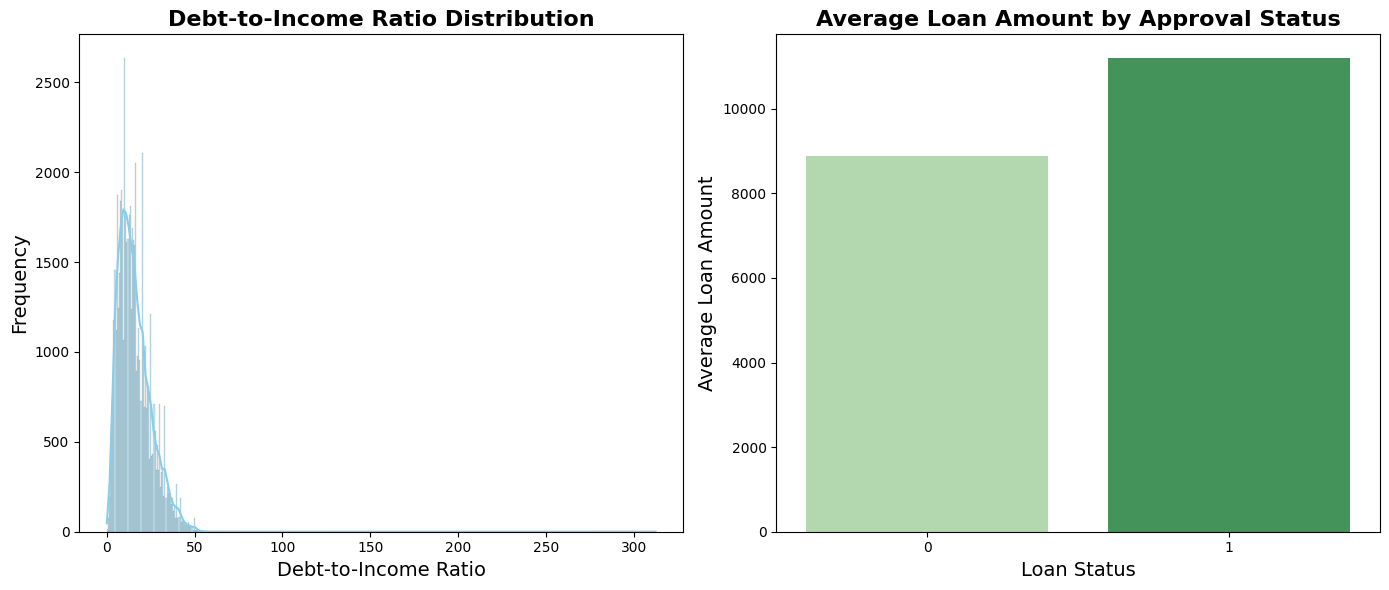

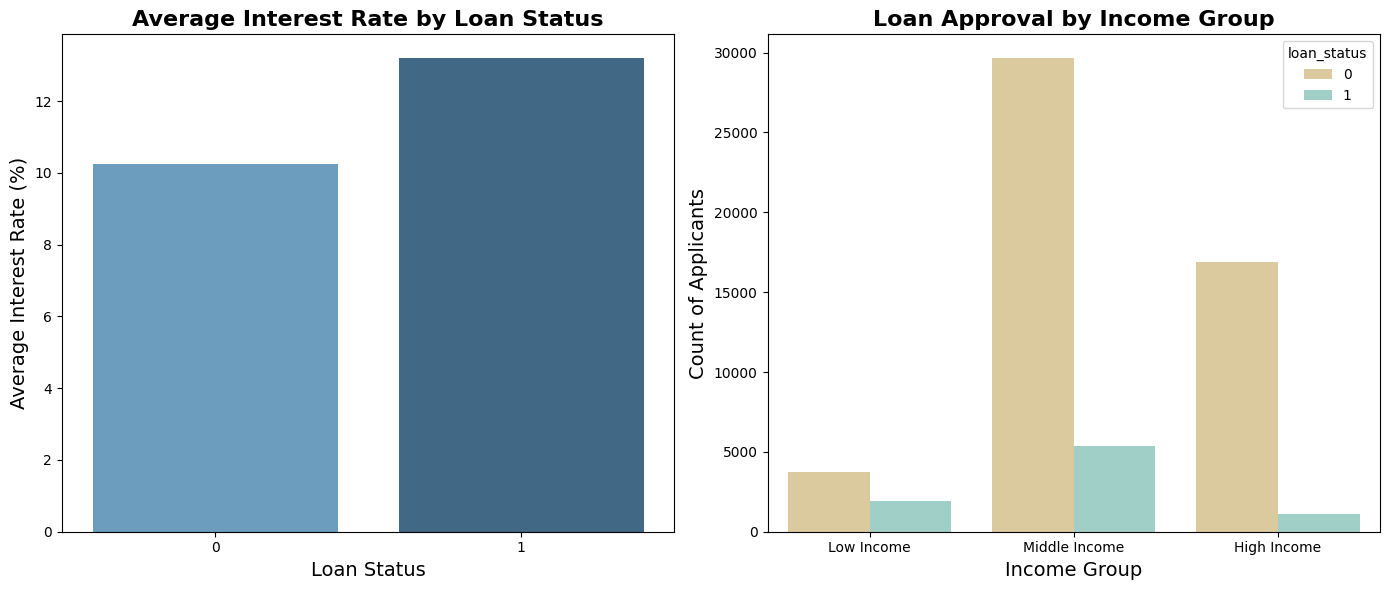

In [21]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_df['DTI'], kde=True, color='skyblue')
plt.title('Debt-to-Income Ratio Distribution', fontsize=16, weight='bold')
plt.xlabel('Debt-to-Income Ratio', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.subplot(1, 2, 2)
sns.barplot(x='loan_status', y='loan_amnt', data=loan_amnt_approval, palette='Greens')
plt.title('Average Loan Amount by Approval Status', fontsize=16, weight='bold')
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Average Loan Amount', fontsize=14)
plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='loan_status', y='loan_int_rate', data=int_rate_approval, palette='Blues_d')
plt.title('Average Interest Rate by Loan Status', fontsize=16, weight='bold')
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Average Interest Rate (%)', fontsize=14)

plt.subplot(1, 2, 2)
sns.countplot(x='Income_Group', hue='loan_status', data=train_df, palette='BrBG')
plt.title('Loan Approval by Income Group', fontsize=16, weight='bold')
plt.xlabel('Income Group', fontsize=14)
plt.ylabel('Count of Applicants', fontsize=14)
plt.tight_layout()
plt.show()

**FacetGrid for Segment Analysis**

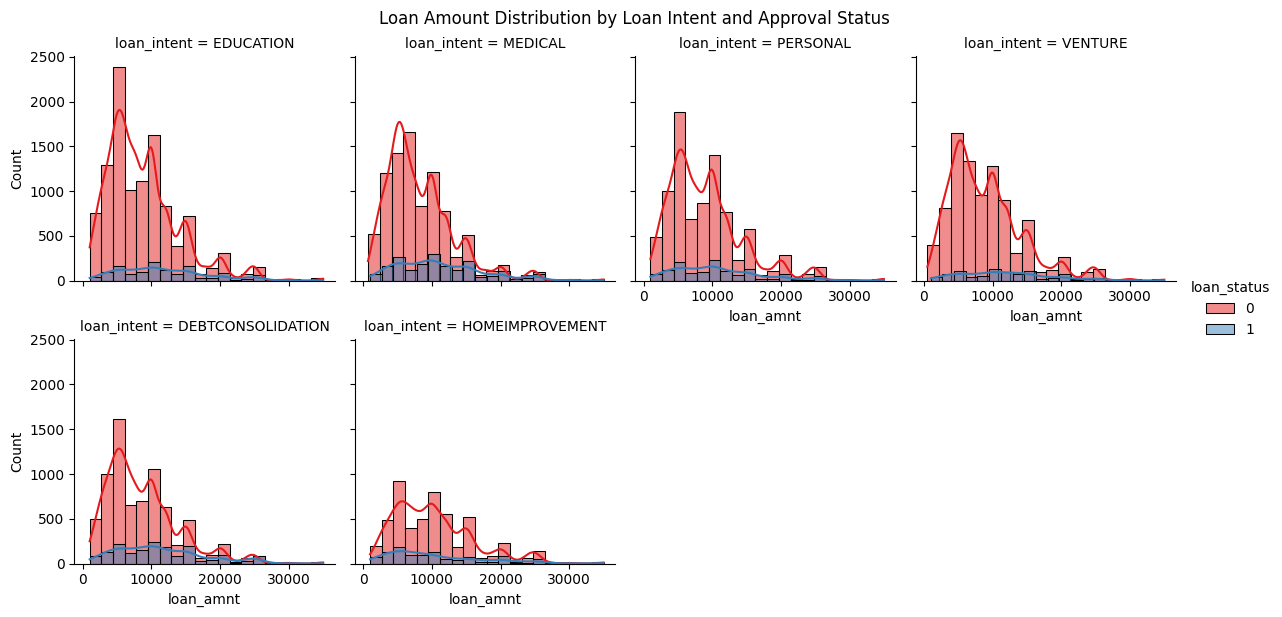

In [22]:
g = sns.FacetGrid(train_df, col="loan_intent", hue="loan_status", palette="Set1", col_wrap=4)
g.map(sns.histplot, "loan_amnt", kde=True, bins=20)
g.add_legend()
plt.suptitle('Loan Amount Distribution by Loan Intent and Approval Status', y=1.02)
plt.show()


**KDE (Kernel Density Estimate) Plot**

Useful for visualizing the distribution of a variable and comparing distributions between approved and rejected loans.

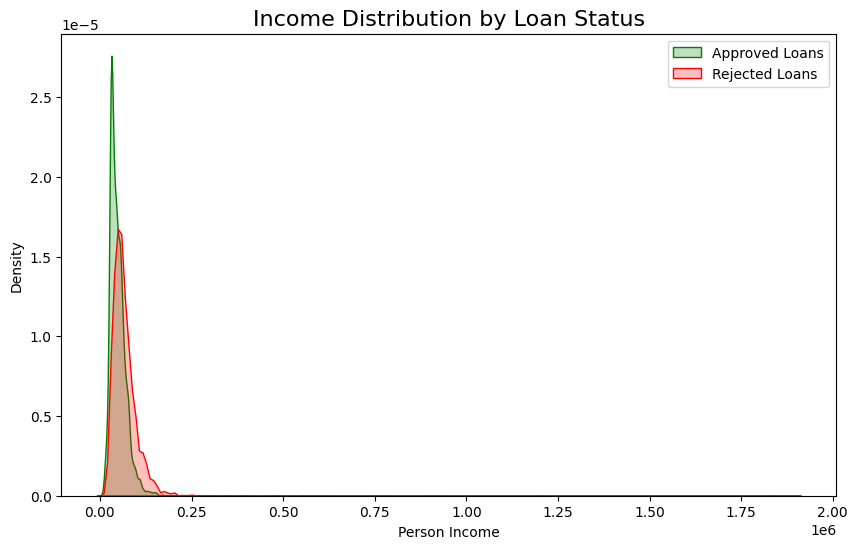

In [23]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train_df[train_df['loan_status'] == 1]['person_income'], color='green', label='Approved Loans', fill=True)
sns.kdeplot(data=train_df[train_df['loan_status'] == 0]['person_income'], color='red', label='Rejected Loans', fill=True)
plt.title('Income Distribution by Loan Status', fontsize=16)
plt.xlabel('Person Income')
plt.ylabel('Density')
plt.legend()
plt.show()

In [24]:
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e10/sample_submission.csv')
display(sample_submission.head())

,id,loan_status
0,58645,0.5
1,58646,0.5
2,58647,0.5
3,58648,0.5
4,58649,0.5


In [25]:
test_df_encoded = pd.get_dummies(test_df)
missing_cols = set(scaled_features_df.columns) - set(test_df_encoded.columns)
for col in missing_cols:
    test_df_encoded[col] = 0
test_df_encoded = test_df_encoded[scaled_features_df.columns]
test_scaled = scaler.transform(test_df_encoded)
test_predictions = xgb_model.predict_proba(test_scaled)[:, 1]
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e10/sample_submission.csv')
sample_submission['loan_status'] = test_predictions
sample_submission.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")


Submission file created: submission.csv
